# Boston Housing Dataset - Regression Models
This notebook demonstrates how to predict housing prices using different regression models:

- **Linear Regression from scratch**
- **Random Forest (manual implementation using Decision Trees)**
- **XGBoost (using the `xgboost` library)**

We'll also evaluate each model and visualize feature importance.

## Load the Dataset
We load the Boston Housing dataset and assign column names manually.

In [1]:
import pandas as pd
import numpy as np

# Define Boston dataset columns manually
column_names = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE",
    "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "PRICE"
]

df = pd.read_csv("housing.csv", delim_whitespace=True, header=None, names=column_names)
df.head()

C:\Users\Taha\AppData\Local\Temp\ipykernel_14328\3110208660.py:10: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv("housing.csv", delim_whitespace=True, header=None, names=column_names)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## Preprocessing
We scale the features using Min-Max scaling and split the dataset into training and testing sets.

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X = df.drop("PRICE", axis=1)
y = df["PRICE"]

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Linear Regression (from Scratch)
We implement gradient descent-based Linear Regression without using scikit-learn's built-in model.

In [3]:
class LinearRegressionScratch:
    def __init__(self, lr=0.01, epochs=1000):
        self.lr = lr
        self.epochs = epochs

    def fit(self, X, y):
        self.m, self.n = X.shape
        self.X = np.c_[np.ones(self.m), X]  # Add intercept
        self.y = y
        self.theta = np.zeros(self.n + 1)

        for _ in range(self.epochs):
            y_pred = self.X.dot(self.theta)
            error = y_pred - self.y
            grad = self.X.T.dot(error) / self.m
            self.theta -= self.lr * grad

    def predict(self, X):
        X = np.c_[np.ones(X.shape[0]), X]
        return X.dot(self.theta)

model_lr = LinearRegressionScratch(lr=0.05, epochs=1000)
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

## Random Forest (Manual Implementation)
A simplified Random Forest model using multiple Decision Trees and bootstrap sampling.

In [4]:
from sklearn.tree import DecisionTreeRegressor

class RandomForestScratch:
    def __init__(self, n_estimators=10, max_depth=None):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.trees = []

    def fit(self, X, y):
        for _ in range(self.n_estimators):
            indices = np.random.choice(len(X), len(X))
            X_sample, y_sample = X[indices], y[indices]
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def predict(self, X):
        preds = np.array([tree.predict(X) for tree in self.trees])
        return np.mean(preds, axis=0)

X_np_train = np.array(X_train)
X_np_test = np.array(X_test)

model_rf = RandomForestScratch(n_estimators=10, max_depth=5)
model_rf.fit(X_np_train, y_train.values)
y_pred_rf = model_rf.predict(X_np_test)

## XGBoost
A powerful gradient boosting algorithm for structured data.

In [6]:
import xgboost as xgb

model_xgb = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=4,
    objective='reg:squarederror',
    random_state=42
)

model_xgb.fit(X_train, y_train)
y_pred_xgb = model_xgb.predict(X_test)

## Model Evaluation
We evaluate each model using RMSE (Root Mean Squared Error) and R² (coefficient of determination).

In [7]:
from sklearn.metrics import mean_squared_error, r2_score

def evaluate_model(name, y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{name} ➤ RMSE: {rmse:.2f}, R²: {r2:.2f}")

evaluate_model("Linear Regression", y_test, y_pred_lr)
evaluate_model("Random Forest", y_test, y_pred_rf)
evaluate_model("XGBoost", y_test, y_pred_xgb)

Linear Regression ➤ RMSE: 5.20, R²: 0.63
Random Forest ➤ RMSE: 3.19, R²: 0.86
XGBoost ➤ RMSE: 2.63, R²: 0.91


## Feature Importance (XGBoost)
We visualize the importance scores of the features based on the trained XGBoost model.

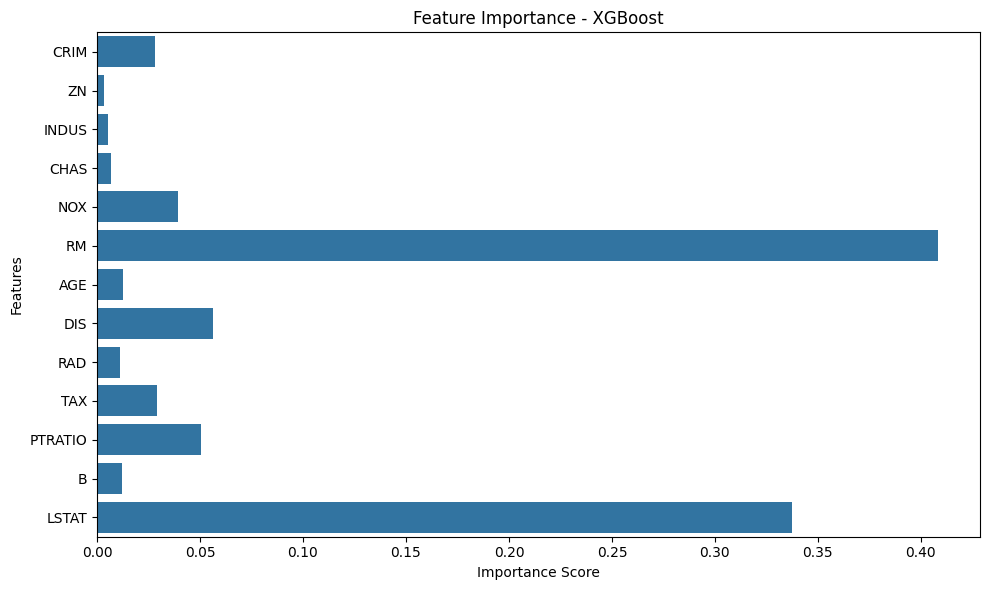

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(x=model_xgb.feature_importances_, y=X.columns)
plt.title("Feature Importance - XGBoost")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()